In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
df = pd.DataFrame({'gender' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,gender,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [15]:
df['gender'].value_counts().sort_index()

1    3
2    2
3    1
Name: gender, dtype: int64

In [17]:
df['gender'] = np.where(df['gender'] == 3, np.nan, df['gender'])
df

,gender,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [18]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [20]:
df.dropna(subset = ['gender', 'score'])\
    .groupby('gender')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
gender,
1.0,4.0
2.0,3.0


In [58]:
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:ylabel='hwy'>

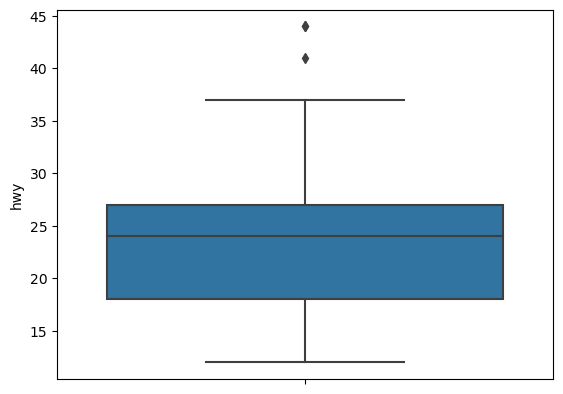

In [23]:
sns.boxplot(data = mpg, y = 'hwy')

In [28]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [29]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [31]:
iqr = pct75 - pct25
iqr *1.5

13.5

In [32]:
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                     np.nan, mpg['hwy'])

In [33]:
mpg['hwy'].isna().sum()

3

In [37]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [43]:
mpg.loc[[9,13,57,92],'drv'] = 'k'

In [44]:
mpg.loc[[28,42,128,202],'city'] = [3,4,39,42]

In [45]:
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [46]:
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']), mpg['drv'], np.nan)

In [47]:
mpg['drv'].isna().sum()

4

In [48]:
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

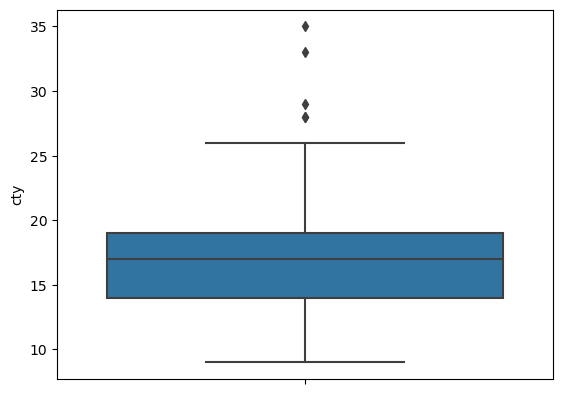

In [49]:
sns.boxplot(data=mpg, y='cty')

In [51]:
pct25 = mpg['cty'].quantile(0.25)
pct75 = mpg['cty'].quantile(0.75)
iqr = pct75 - pct25
iqr

5.0

In [52]:
pct25 - 1.5 * iqr

6.5

In [53]:
pct75 + 1.5 * iqr

26.5

In [54]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

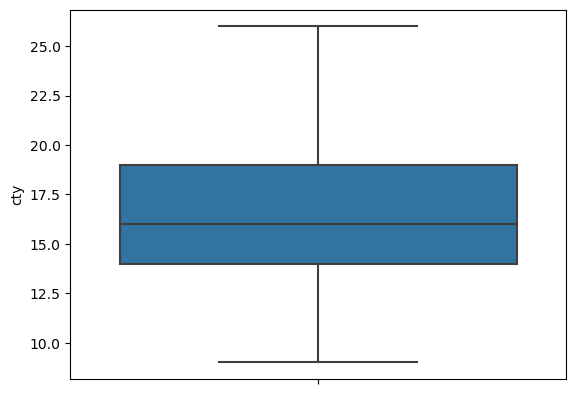

In [55]:
sns.boxplot(data=mpg, y='cty')

In [57]:
mpg.dropna(subset = ['drv', 'cty'])\
    .groupby('drv')\
    .agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.260000
f,19.445545
r,13.958333


[(3.0, 6.0), (10.0, 30.0)]

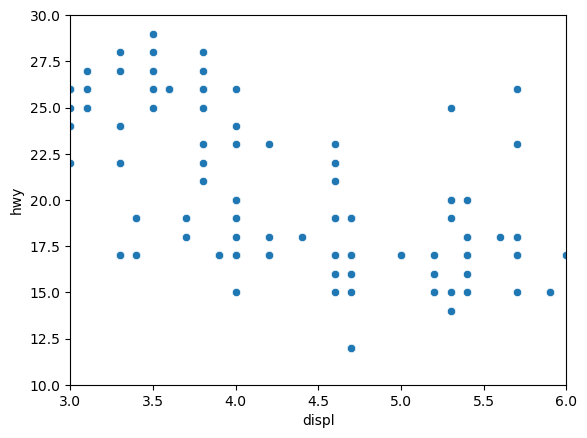

In [60]:
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim=(3, 6), ylim= (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

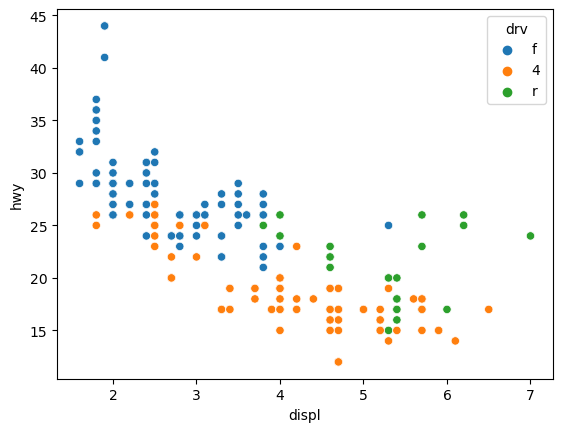

In [62]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue = 'drv')